In [1]:
import sys
sys.path.append("..")  # utilsは1階層上にある

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from utils.models import LSTMModel,LSTMPriceModel
from utils.trainer import train_price
from utils.datawindow import TorchDataWindow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("..")  # utilsは1階層上にある

df = pd.read_csv('../data/Apple.csv')
df.head()

,date,Open,High,Low,Volume,Close
0,2018-01-02,39.933990,40.436216,39.722772,102223600,40.426826
1,2018-01-03,40.490191,40.964255,40.356422,118071600,40.419785
2,2018-01-04,40.492547,40.710806,40.384594,89738400,40.607544
3,2018-01-05,40.703751,41.156691,40.612224,94640000,41.069859
4,2018-01-08,40.917324,41.213026,40.818753,82271200,40.917324


In [3]:
df_close = df['Close'].values
df_close = torch.tensor(df_close, dtype=torch.float32).view(-1, 1)
w = TorchDataWindow(df_close, input_width=60, label_width=20, shift=1, label_columns=[0], feature_names=['Close'])

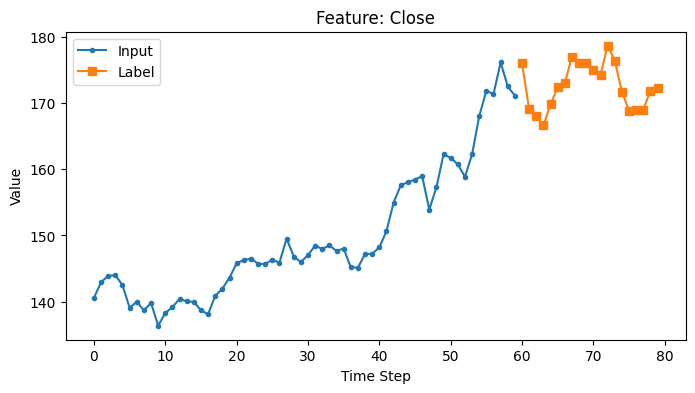

In [4]:
loader = w.to_dataloader(batch_size=32, shuffle=True)
x_batch, y_batch = next(iter(loader))

w.plot(batch=(x_batch, y_batch), feature=0, feature_name='Close')

In [5]:
sequence = []
for x,y in w:
    seq = torch.cat([x.squeeze(1),y.squeeze(1)])
    sequence.append(seq.tolist())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMPriceModel(input_dim=1, hidden_dim=128, num_layers=2).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [6]:
train_price(model,sequence, optimizer, device=device,
            temperature=0.05, dreaming_ratio=0.2, dreaming_seq_len=50, epochs=20)

[Epoch 1] loss=630.088387, dreaming_loss=0.002518
[Epoch 2] loss=993.868358, dreaming_loss=0.002484
[Epoch 3] loss=386.081611, dreaming_loss=0.002514
[Epoch 4] loss=294.197754, dreaming_loss=0.002485
[Epoch 5] loss=106.030185, dreaming_loss=0.002463
[Epoch 6] loss=53.396302, dreaming_loss=0.002528
[Epoch 7] loss=24.758674, dreaming_loss=0.002508
[Epoch 8] loss=10.216471, dreaming_loss=0.002515
[Epoch 9] loss=10.936950, dreaming_loss=0.002511
[Epoch 10] loss=23.620160, dreaming_loss=0.002465
[Epoch 11] loss=11.751884, dreaming_loss=0.002510
[Epoch 12] loss=10.984644, dreaming_loss=0.002509
[Epoch 13] loss=9.360574, dreaming_loss=0.002528
[Epoch 14] loss=12.791308, dreaming_loss=0.002516
[Epoch 15] loss=11.571563, dreaming_loss=0.002487
[Epoch 16] loss=13.908538, dreaming_loss=0.002518
[Epoch 17] loss=9.259378, dreaming_loss=0.002569
[Epoch 18] loss=9.639441, dreaming_loss=0.002498
[Epoch 19] loss=12.601590, dreaming_loss=0.002518
[Epoch 20] loss=9.851724, dreaming_loss=0.002517
